### Introduction

This notebook is an attempt to create a model that allows prediction of monthly rent prices given a set of characteristics of a residence. The dataset contains characteristics and rent prices of residences in Washington.

As predicting a numerical variable (rent) is required, linear regression methods would be used.

This notebook would be focusing on 
- EDA
- Data Manipulation
- Comparing different models


Problem
In this problem, we’ve acquired some data about current rent prices in Washington, D.C. We would like to use this data to create a model that can predict what the rent price should be for new properties that come onto the market.



### EDA


In [237]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [238]:
data = pd.read_csv('washingtondc_data.csv')
print(len(data),"rows")
print(len(data.columns.values),"columns")
print("Column names: ", data.columns.values)


10939 rows
12 columns
Column names:  ['id' 'sqft' 'bedrooms' 'bathrooms' 'zip' 'city' 'neighbourhood'
 'norm_property_type' 'norm_laundry' 'norm_parking' 'quality' 'rent']


In [239]:
data.head()

,id,sqft,bedrooms,bathrooms,zip,city,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
0,1432244,649.0,1.0,1.0,20004,Washington,Penn Quarter,apartment,In Unit,Garage,1.000000,649.0
1,2311027,436.0,1.0,1.0,20036,Washington,Dupont Circle,condominium,NaN,NaN,0.000000,662.0
2,1260774,696.0,1.0,1.0,20001,Washington,Chinatown,apartment,In Unit,NaN,0.000000,727.0
3,2895465,550.0,1.0,1.0,20002,Washington,Ivy City,apartment,NaN,NaN,0.000000,800.0
4,2245415,620.0,1.0,1.0,20019,Washington,Marshall Heights,apartment,NaN,Off Street,0.719846,800.0


In [240]:
data = data.astype({'zip': 'object'})
categorical_features = data.select_dtypes(include = ["object"]).columns.values
numerical_features = data.select_dtypes(exclude = ["object"]).columns.values
print("Numerical features :", len(numerical_features))
print(numerical_features)
print("Categorical features :", len(categorical_features))
print(categorical_features)

Numerical features : 6
['id' 'sqft' 'bedrooms' 'bathrooms' 'quality' 'rent']
Categorical features : 6
['zip' 'city' 'neighbourhood' 'norm_property_type' 'norm_laundry'
 'norm_parking']


In [466]:
#### Exploration of categorical variables

#### Exploration of variable: *city*

In [465]:
print("Distinct values:", data.city.unique())

Distinct values: ['Washington']


#### Exploration of variable: *neighbourhood*

In [6]:
print("Distinct values:", data.neighbourhood.unique())

Distinct values: ['Penn Quarter' 'Dupont Circle' 'Chinatown' 'Ivy City' 'Marshall Heights'
 'Lamond Riggs' 'Washington Highlands' 'Southeast Washington'
 'Central Northeast' 'Stanton Park' 'Adams Morgan' 'Bellevue' 'Carver'
 'Cardozo/Shaw' 'Skyland' 'George Washington University'
 '16th Street Heights' 'Edgewood' 'Congress Heights' 'Douglass'
 'Cleveland Park' 'Grant Park' 'Langston' 'Cathedral Heights'
 'Fort Dupont' 'Shipley' 'Chevy Chase' 'Bloomingdale' 'Logan Circle/Shaw'
 'Takoma' 'Twining' 'Langdon' 'Lincoln Park' 'Greenway'
 'Burleith/Hillandale' 'Columbia Heights' 'Near Northeast' 'Penn Branch'
 'Kingman Park' 'Petworth' 'Crestwood' 'Brightwood Park' 'Mayfair'
 'Anacostia' 'Woodley Park' 'Northwest Washington' 'Hillside' 'Palisades'
 'Spring Valley' 'Pleasant Hill' 'Garfield Heights' 'Foxhall Crescent'
 'Fort Totten' 'Glover Park' 'Pleasant Plains' 'Brightwood' 'Hillsdale'
 'Friendship Heights' 'Brookland' 'Buzzard Point' 'Hampshire Knolls'
 'Hill East' 'Fairlawn' 'Lanier Heigh

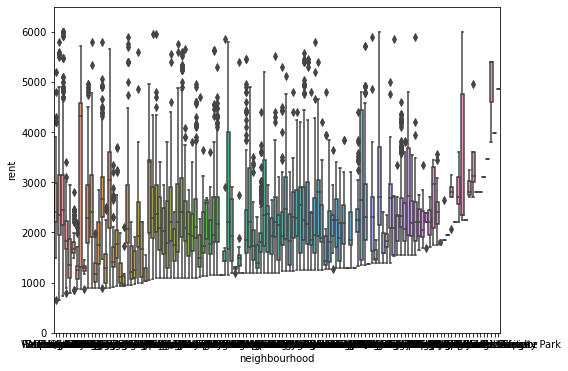

In [7]:
# box plot neighbourhood/rent
var = 'neighbourhood'
d = pd.concat([data['rent'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=d)
fig.axis(ymin=0, ymax=6500);

Clearly the rent prices differ in different neighbourhoods

#### Exploration of variable : *norm_property_type*

In [8]:
print("Distinct values:", data.norm_property_type.unique())

Distinct values: ['apartment' 'condominium' 'other' 'house' 'townhouse']


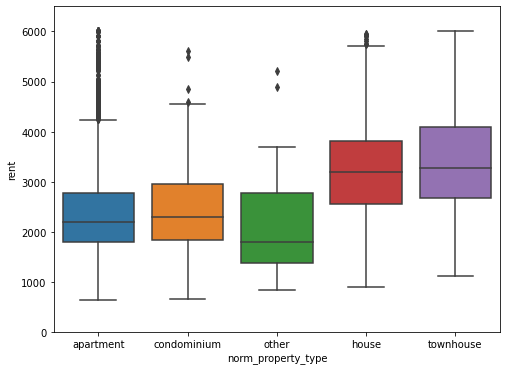

In [9]:
# box plot norm_property_type/rent
var = 'norm_property_type'
d = pd.concat([data['rent'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=d)
fig.axis(ymin=0, ymax=6500);

The above boxplot shows that rent prices tend to generally increase according to the type of apartment where other < apartment < condominium < house < townhouse. This intuitively does make sense as houses and townhouses are usually much bigger than apartments and condos, while condos have many facilties and good security that leads to higher rent prices. 

Something interesting to note is that there are many anomalies present in apartments with very high rent prices, some of them being much higher than condos, houses and townhouses

#### Exploration of variable : *norm_laundry*


In [10]:
print("Distinct values:", data.norm_laundry.unique())

Distinct values: ['In Unit' nan 'On Site' 'None' 'In Building']


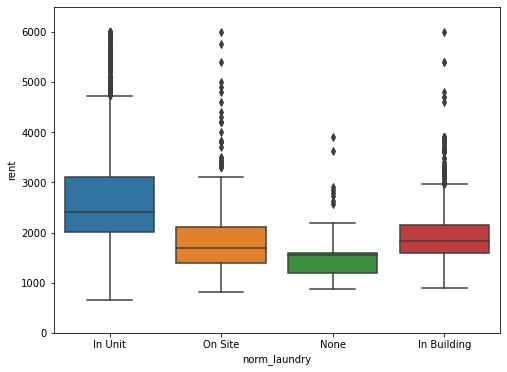

In [11]:
# box plot norm_property_type/rent
var = 'norm_laundry'
d = pd.concat([data['rent'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=d)
fig.axis(ymin=0, ymax=6500);

The above boxplot does show a pattern where the rent prices does have a relation to the location of the laundry. Intuitively, we know that interms of convenience level, in-unit laundry > in-building laundry > onsite-laundry, which may affect the rent price.

#### Exploration of variable : *zip*

In [12]:
print("Distinct values:", data.zip.unique())

Distinct values: [20004 20036 20001 20002 20019 20012 20032 20009 20020 20006 20011 20017
 20008 20016 20015 20018 20003 20007 20010 20307 20024 20037 20317 20005
 20057 20405 20748 20912 20319 20535 20053]


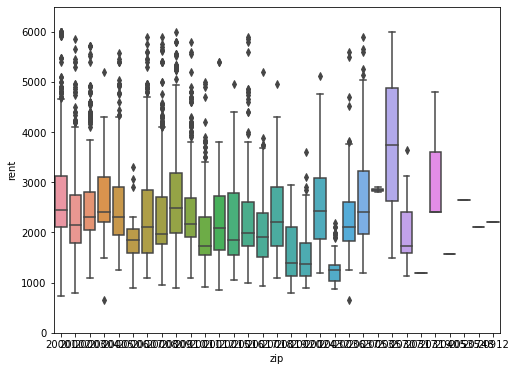

In [13]:
# box plot zip/rent
var = 'zip'
d = pd.concat([data['rent'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=d)
fig.axis(ymin=0, ymax=6500);

#### Exploration of variable : *norm_parking*

In [14]:
print("Distinct values:", data.norm_parking.unique())

Distinct values: ['Garage' nan 'Off Street' 'Street' 'Carport' 'None' 'Other']


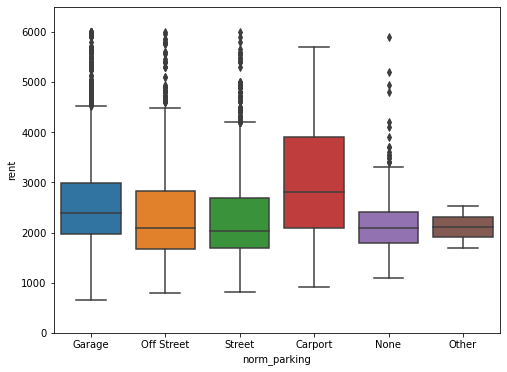

In [15]:
# box plot norm_property_type/rent
var = 'norm_parking'
d = pd.concat([data['rent'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=d)
fig.axis(ymin=0, ymax=6500);

In [467]:
# Exploration of numerical variables

In [16]:
data[numerical_features].head(10)

,id,sqft,bedrooms,bathrooms,quality,rent
0,1432244,649.0,1.0,1.0,1.000000,649.0
1,2311027,436.0,1.0,1.0,0.000000,662.0
2,1260774,696.0,1.0,1.0,0.000000,727.0
3,2895465,550.0,1.0,1.0,0.000000,800.0
4,2245415,620.0,1.0,1.0,0.719846,800.0
5,1862477,650.0,1.0,1.0,0.541632,823.0
6,1564279,220.0,0.0,1.0,0.569648,850.0
7,1509661,220.0,0.0,1.0,0.555567,850.0
8,1587723,700.0,1.0,1.0,1.000000,870.0
9,2061997,700.0,1.0,1.0,0.102553,870.0


In [17]:
data.describe()

,id,sqft,bedrooms,bathrooms,quality,rent
count,1.093900e+04,10939.000000,10939.000000,10939.000000,10939.000000,10939.000000
mean,2.094602e+06,815.363379,1.276442,1.269997,0.752357,2408.104763
std,7.915353e+05,362.622903,0.863517,0.545625,0.348736,829.887039
min,8.720050e+05,200.000000,0.000000,0.000000,0.000000,649.000000
25%,1.349734e+06,580.000000,1.000000,1.000000,0.489636,1818.000000
50%,2.075274e+06,725.000000,1.000000,1.000000,1.000000,2220.000000
75%,2.723142e+06,977.000000,2.000000,1.500000,1.000000,2869.000000
max,3.561458e+06,4116.000000,6.000000,5.000000,1.000000,5999.000000


In [18]:
data[numerical_features].dtypes

id             int64
sqft         float64
bedrooms     float64
bathrooms    float64
quality      float64
rent         float64
dtype: object

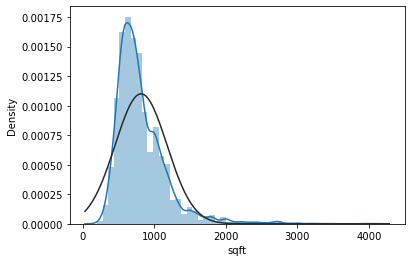

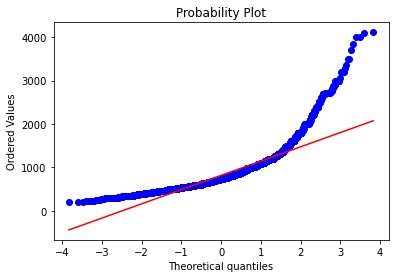

In [19]:
#histogram and normal probability plot
sns.distplot(data['sqft'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data['sqft'], plot=plt)

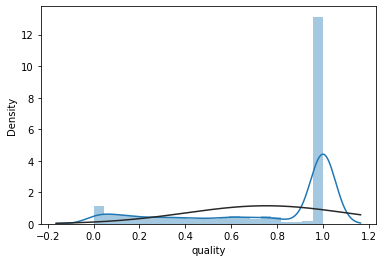

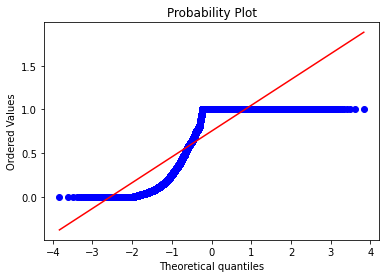

In [20]:
#histogram and normal probability plot
sns.distplot(data['quality'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data['quality'], plot=plt)

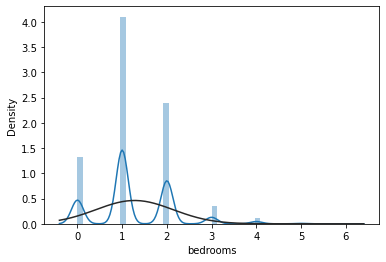

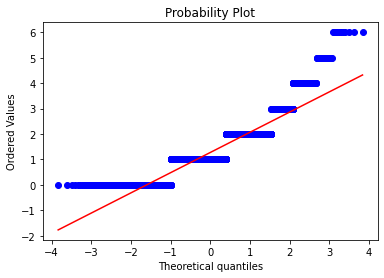

In [21]:
#histogram and normal probability plot
sns.distplot(data['bedrooms'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data['bedrooms'], plot=plt)

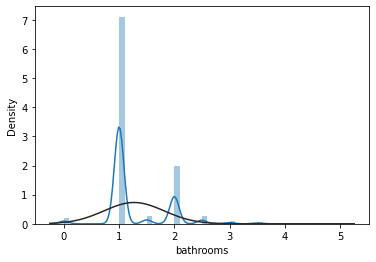

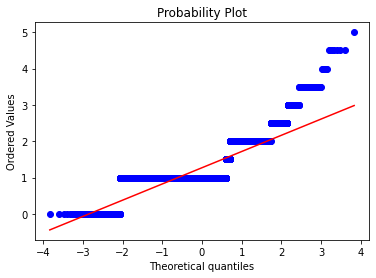

In [22]:
#histogram and normal probability plot
sns.distplot(data['bathrooms'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data['bathrooms'], plot=plt)

All of the numerical variables are positively skewed other than quality, which is negatively skewed. The positively skewed varaibles should be log(x+1) transformed so that they are of a normal distribution. The variable quality should undergo exponential transformation so that it would be similar to a normal distribution.

#### Correlation Matrix

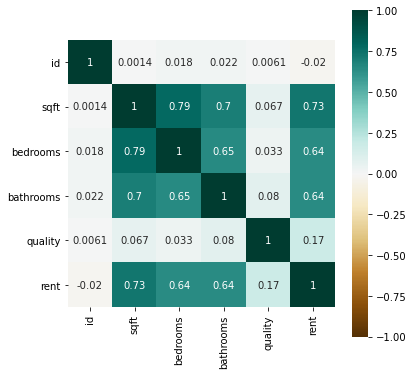

In [23]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, square=True, vmin=-1, vmax=1, annot=True, cmap='BrBG');

The above correlation matrix provides a simple overview of the relationships between the numerical variables with rent. 

sqft appears to have a strong correlation with rent and intuitively this does make sense. bedrooms and bathrooms are also positively correlated with rent, however it is interesting to observe that their correlation coefficient is the same. bedrooms and bathrooms have a positive relationship with sqft, which intuitively makes sense as we would expect more bedrooms and bathrooms to contribute more sqft area to the residence.

an interesting observation is the negligible relationship between quality and rent. we would expect that the quality of the residence would play a major role in the calculation of the rent price however the correlation coefficient seems to disprove that assumption. we should note that pearson correlation was used in the computation of the correlation coefficients which evaluates the linear relationship between variables. as such, we should also plot a scatterplot between variables to see if there are polynomial/exponential etc relationships between them.

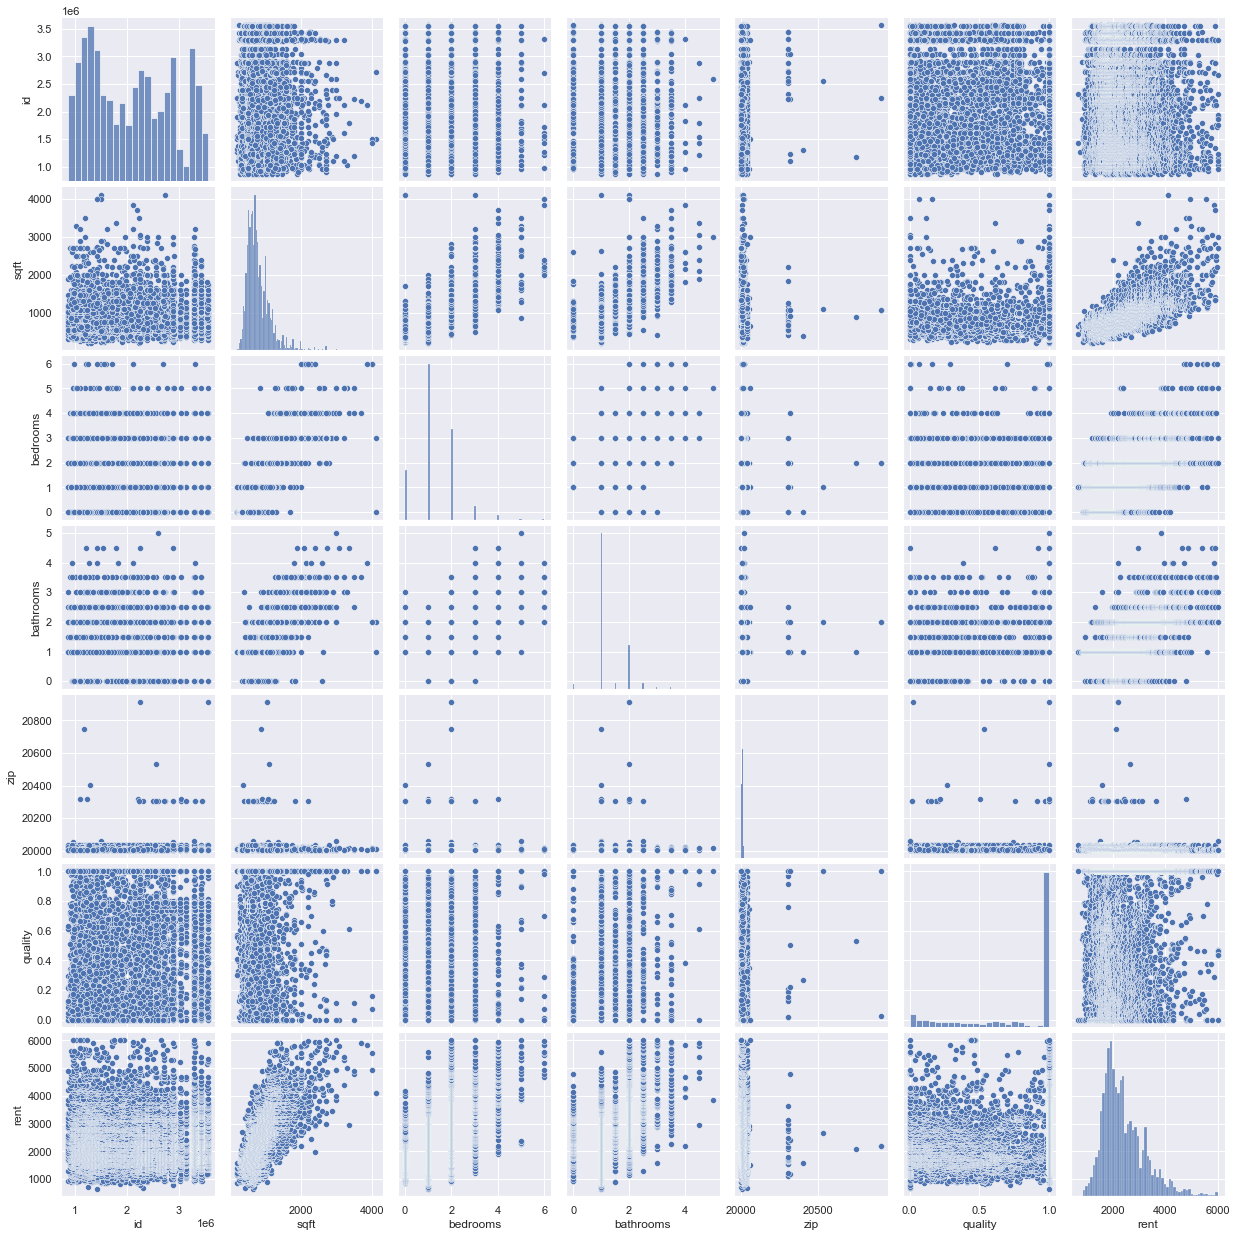

In [24]:
# scatterplot
sns.set()
sns.pairplot(data, height = 2.5)
plt.show();

scatterplot between quality and rent does not show any relationship between the two variables.

In [25]:
# view proportion of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(len(data.columns.values))

,Total,Percent
norm_parking,1514,0.138404
norm_laundry,597,0.054575
rent,0,0.000000
quality,0,0.000000
norm_property_type,0,0.000000
neighbourhood,0,0.000000
city,0,0.000000
zip,0,0.000000
bathrooms,0,0.000000
bedrooms,0,0.000000


a few null values are only found in norm_parking and norm_laundry

In [26]:
len(data[(data["norm_parking"].isnull()) & (data["quality"] == 0)])

35

In [27]:
len(data[(data["norm_laundry"].isnull()) & (data["quality"] == 0)])

19

In [28]:
data[data["quality"] == 0].tail(10)

,id,sqft,bedrooms,bathrooms,zip,city,neighbourhood,norm_property_type,norm_laundry,norm_parking,quality,rent
10806,1185472,3500.0,5.0,3.5,20011,Washington,Petworth,house,On Site,Off Street,0.0,4900.0
10821,2248724,1048.0,2.0,2.0,20007,Washington,Georgetown,apartment,NaN,NaN,0.0,4950.0
10885,1604819,2000.0,4.0,3.0,20009,Washington,Dupont Circle,apartment,In Unit,Street,0.0,5550.0
10886,1267627,2000.0,4.0,3.0,20009,Washington,Dupont Circle,apartment,In Unit,Street,0.0,5550.0
10887,1234289,2000.0,4.0,3.0,20009,Washington,Dupont Circle,apartment,In Unit,Street,0.0,5550.0
10894,1258665,1600.0,4.0,2.0,20036,Washington,Dupont Circle,townhouse,In Unit,Garage,0.0,5600.0
10896,1563276,2400.0,6.0,3.5,20016,Washington,Cathedral Heights,house,In Unit,Off Street,0.0,5600.0
10912,2248652,3061.0,4.0,4.5,20016,Washington,Spring Valley,apartment,NaN,NaN,0.0,5800.0
10913,3306766,2000.0,4.0,3.0,20009,Washington,Dupont Circle,apartment,In Unit,Street,0.0,5800.0
10926,3298096,3000.0,5.0,2.5,20057,Washington,Georgetown,townhouse,On Site,Off Street,0.0,5999.0


### Data Manipulation


In [241]:
from scipy.stats import skew
def data_munge(df):
    # drop id as it is an irrelevant variable and drop quality 
    # as it does not seem to have a relationship with rent
    if ("rent" in df.columns):
        skewness = df[numerical_features].apply(lambda x: skew(x))
    else:
        skewness = df[numerical_features[numerical_features != 'rent']].apply(lambda x: skew(x))
    skewness = skewness[skewness > 0.5]
    skewed_features = skewness.index
    df[skewed_features] = np.log1p(df[skewed_features])
    # Encode some categorical variables as ordered numbers since there is information in the order
    df = df.replace({
    "norm_parking" : {"None" : 0, "Other" : 1, "Street":2,"Off Street":3, 
                      "Garage": 4, "Carport": 5}, 
                       
    "norm_laundry" :{"None":0,"On Site":1,"In Building":2, "In Unit":3}, 
                       
    "norm_property_type":{"other":0,"apartment":1, "condominium":2, 
                          "house":3, "townhouse": 4}})
    df = df.dropna()
    df.astype({'norm_laundry': 'int32','norm_parking': 'int32'}).dtypes
    
    df = pd.get_dummies(df)
    return df.drop(columns=["id", "quality"])

In [242]:
df_data = data_munge(data)

In [243]:
df_data.columns.values

array(['sqft', 'bedrooms', 'bathrooms', 'norm_property_type',
       'norm_laundry', 'norm_parking', 'rent', 'zip_20001', 'zip_20002',
       'zip_20003', 'zip_20004', 'zip_20005', 'zip_20006', 'zip_20007',
       'zip_20008', 'zip_20009', 'zip_20010', 'zip_20011', 'zip_20012',
       'zip_20015', 'zip_20016', 'zip_20017', 'zip_20018', 'zip_20019',
       'zip_20020', 'zip_20024', 'zip_20032', 'zip_20036', 'zip_20037',
       'zip_20053', 'zip_20057', 'zip_20307', 'zip_20317', 'zip_20319',
       'zip_20405', 'zip_20535', 'zip_20748', 'zip_20912',
       'city_Washington', 'neighbourhood_16th Street Heights',
       'neighbourhood_Adams Morgan', 'neighbourhood_Anacostia',
       'neighbourhood_Arboretum', 'neighbourhood_Barry Farm',
       'neighbourhood_Bellevue', 'neighbourhood_Benning',
       'neighbourhood_Bloomingdale', 'neighbourhood_Brentwood',
       'neighbourhood_Brightwood', 'neighbourhood_Brightwood Park',
       'neighbourhood_Brookland', 'neighbourhood_Burleith/Hillandal

In [244]:
print("Find most important features relative to target")
corr = df_data.corr()
corr.sort_values(["rent"], ascending = False, inplace = True)
print(corr.rent.head(10))

Find most important features relative to target
rent                       1.000000
sqft                       0.723534
bedrooms                   0.605879
bathrooms                  0.580822
norm_laundry               0.420173
norm_property_type         0.232714
norm_parking               0.201417
zip_20009                  0.129580
zip_20001                  0.127926
neighbourhood_Chinatown    0.123748
Name: rent, dtype: float64


In [245]:
y = df_data.rent
df = df_data.drop(columns=["rent"])
df.head()

,sqft,bedrooms,bathrooms,norm_property_type,norm_laundry,norm_parking,zip_20001,zip_20002,zip_20003,zip_20004,...,neighbourhood_Tenleytown,neighbourhood_Trinidad,neighbourhood_Truxton Circle,neighbourhood_Twining,neighbourhood_University Heights,neighbourhood_Washington Highlands,neighbourhood_West End,neighbourhood_Woodland-Normanstone,neighbourhood_Woodley Park,neighbourhood_Woodridge
0,6.476972,0.693147,0.693147,1,3.0,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6.478510,0.693147,0.693147,1,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5.398163,0.000000,0.693147,0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5.398163,0.000000,0.693147,0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6.552508,0.693147,0.693147,2,0.0,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Model Building and Comparisons

#### Partitioning of dataset for regularization algorithims (lasso, ridge, elasticnet)

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (6542, 157)
X_test : (2804, 157)
y_train : (6542,)
y_test : (2804,)


In [35]:
final_numeric_features = [i for i in numerical_features if i not in ["quality","id","rent"]]
final_numeric_features

['sqft', 'bedrooms', 'bathrooms']

#### Standardization of numerical features

It is necessary to standardize variables before using Lasso and Ridge Regression. Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. The result of centering the variables means that there is no longer an intercept. This applies equally to ridge regression.

In [36]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
X_train.loc[:, final_numeric_features] = stdSc.fit_transform(X_train.loc[:, final_numeric_features])
X_test.loc[:, final_numeric_features] = stdSc.transform(X_test.loc[:, final_numeric_features])

I am using the root mean squared error (RMSE) performance metric to check the performance of the trained models. Root mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values. Hence, I'd have to create functions that allow for the computation of rmse for the regularization algorithms

In [37]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import cross_val_score
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

#### Modelling using Lasso Regression

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 7e-05
Lasso RMSE on Training set : 0.14351550910452482
Lasso RMSE on Test set : 0.14698993517951342


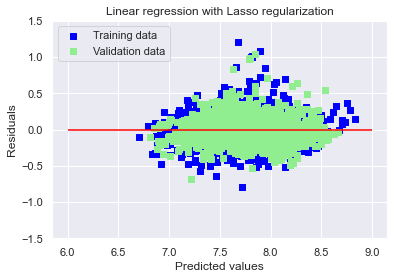

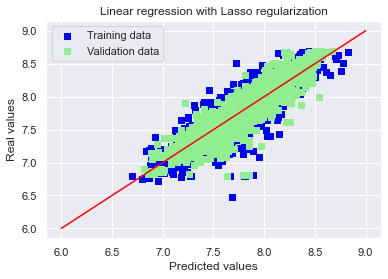

Lasso picked 86 features and eliminated the other 71 features


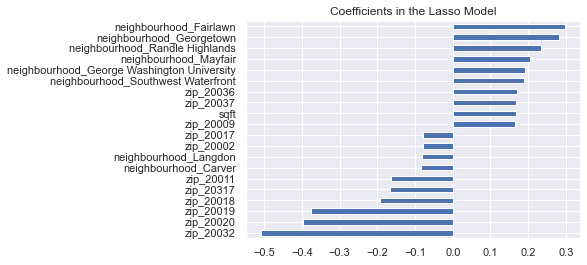

In [38]:
# Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 10000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 6, xmax = 9, color = "red")
plt.ylim(-1.5, 1.5)
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([6, 9], [6, 9], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Lasso model:
Errors seem randomly distributed and randomly scattered around the centerline. It means our model was able to capture most of the explanatory information. The very small difference between training and test results indicate that we eliminated most of the overfitting. 


The lasso model deemed 86 features out of the 157 features to be the most important features to use for training. Interestingly, the most important positive feature is neighbourhood_Fairlawn, followed by neighbourhood_Georgetown and neighbourhood_Randle Highlands

#### Modelling using Ridge Regression

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 0.8
Ridge RMSE on Training set : 0.14335722206422885
Ridge RMSE on Test set : 0.1476022322584158


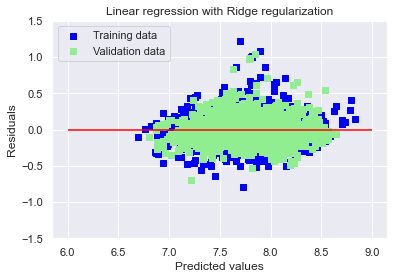

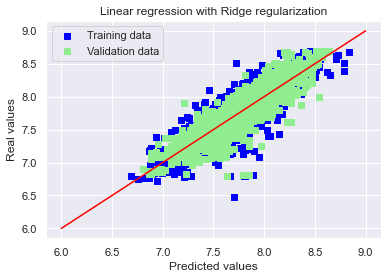

Ridge picked 151 features and eliminated the other 6 features


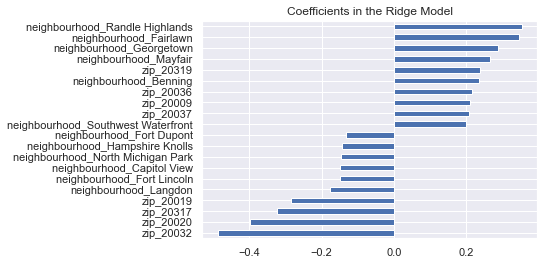

In [39]:
# Ridge
ridge = RidgeCV(alphas = [0.05,0.5,1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 6, xmax = 9, color = "red")
plt.ylim(-1.5, 1.5)
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([6, 9], [6, 9], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Ridge model:
Similar to the Lasso model, errors seem randomly distributed and randomly scattered around the centerline. It means our model was able to capture most of the explanatory information. The RMSE values are also quite similar to the Lasso Model but the RMSE of the test set is slightly larger than the rmse of the test set in the lasso model

The ridge model deemed 86 features out of the 151 features to be the most important features to use for training. Interestingly, the most important positive feature is neighbourhood_Randle Highlands, neighbourhood_Fairlawn, followed by neighbourhood_Georgetown

#### Modelling using ElasticNet

Best l1_ratio : 0.1
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.0001
Best l1_ratio : 0.085
Best alpha : 9.5e-05
ElasticNet RMSE on Training set : 0.14337803191179657
ElasticNet RMSE on Test set : 0.1479435860254766


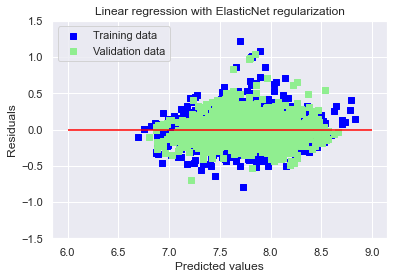

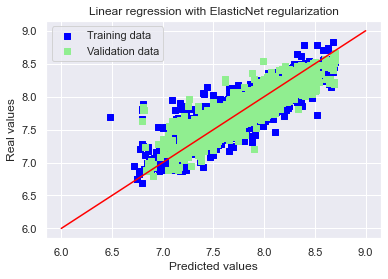

ElasticNet picked 138 features and eliminated the other 19 features


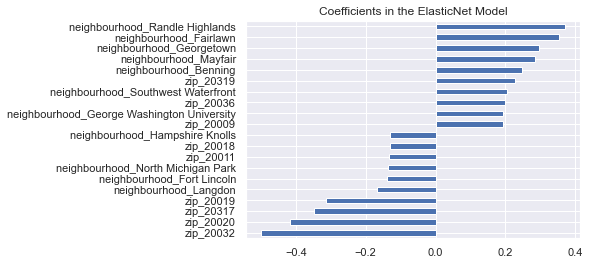

In [40]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.ylim(-1.5, 1.5)
plt.hlines(y = 0, xmin = 6, xmax = 9, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([6, 9], [6, 9], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

ElasticNet model:
The ElasticNet model deemed 86 features out of the 138 features to be the most important features to use for training. Interestingly, the most important positive feature is neighbourhood_Randle Highlands, neighbourhood_Fairlawn, followed by neighbourhood_Georgetown. 

In [471]:
import xgboost as xgb
xgb_y = df_data.rent
xbg_X = df_data.drop(columns=["rent"])
data_dmatrix = xgb.DMatrix(data=xbg_X,label=xgb_y)
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(xbg_X, xgb_y, test_size=0.3, random_state=123)

In [468]:
xgb1 = xgb.XGBRegressor()
parameters = { #when use hyperthread, xgboost may become slower
              
    'learning_rate': [0.15999999999999998], #so called `eta` value
              'max_depth': range(15,20),
              'min_child_weight': [4],
              'subsample': [.2],
                'reg_alpha':[0.2],
                 'reg_lambda':[0.25],
              'colsample_bytree': np.arange(0.1,0.4, 0.05),
              'n_estimators': [210],
                'colsample_bylevel':[0.5,1]}
from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True,
                       scoring='neg_root_mean_squared_error')
xgb_grid.fit(xgb_X_train,
         xgb_y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 140 out of 140 | elapsed:  1.3min finished


-0.1280928693502955
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.40000000000000013, 'learning_rate': 0.15999999999999998, 'max_depth': 17, 'min_child_weight': 4, 'n_estimators': 210, 'reg_alpha': 0.2, 'reg_lambda': 0.25, 'subsample': 0.2}


In [469]:
model =  xgb_grid.best_estimator_
y_predict_test = model.predict(xgb_X_test)
rmse = np.sqrt(mean_squared_error(xgb_y_test, y_predict_test))
print("RMSE: %f" % (rmse))

RMSE: 0.118563


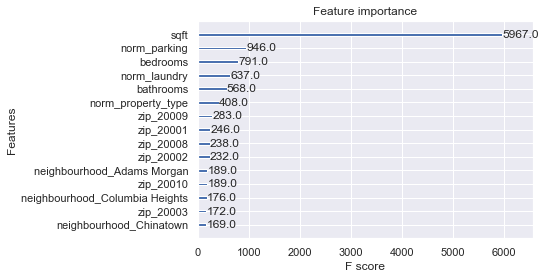

In [470]:
xgb.plot_importance(xg_reg, max_num_features = 15)
plt.show()

The xgboost model performs better than the regularizing algorithms based on the rmse that was computed. Hence, we shall use this model for prediction

In [463]:
def output_preds(df_data):
    all_features = model.get_booster().feature_names
    df_data = data_munge(df_data)
    df_data.drop(columns=df_data.columns.difference(all_features), inplace=True)
    for x in all_features :
        if (x not in df_data.columns):
            df_data[x] = 0
    raw_preds = model.predict(df_data)
    
    return np.expm1(raw_preds)

### Answering Questions

#### Q1: How are you modelling the problem?

There are many machine learning algorithms that serve different purposes. Since the purpose of this problem is predicting a numerical value, I decided to use algorithms known to produce good results when predicting a numerical value, such as regularization algos (lasso, ridge and elasticnet) as well as decision trees. 

#### Q2: Why did you choose this type of approach?

When one realises that the predictor is numerical, the go-to method is to attempt a simple OLS linear regression. However, linear regression tends to find coefficient values that maximise the r-square value. However, this may result in the model including terms that have little predictive power as it finds coefficients for all of the terms included in the model. This unfortunately leads to a high-variance but low-bias model. 

As such, I decided to first focus on regularization models which penalize the weights of indpendent variables, thus selecting a mid-point between high bias and high variance. Thus I focused on using lasso L1 regression, ridge L2 regression and elasticnet which uses both L1 and L2 regression. I used the inbuilt cross-validation functions to select the best values for the parameters to ensure that the model doesnt underfit and most importantly, does not overfit.

While researching about the use of decision trees in predicting numerical values, I came across xgboost, a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It has amazing speed and also performance as a model. Its usage in many kaggle competitions intruiged me and I decided to also train xgboost and compare its performance with the regularization algorithms.

After training all 4 models, xgboost came out on top by having the lowest rmse for both train and tests sets.

#### Q3: Which features are the most important predictor for rent prices?

Based on the xgboot plot of feature importance, the most important predictor is sqft, and other important predictors include norm_property_type and bathrooms and some zipcode/neighbourhood features. sqft being the most importance feature makes sense

#### Q4: How does your model fare with regards to the bias-variance tradeoff? Could it be improved?

xgboost, as a boosting algorithm, deals with both bias and variance (bias-variance tradeoff). Reductions of both bias and variance comes about from tuning the models parameters.

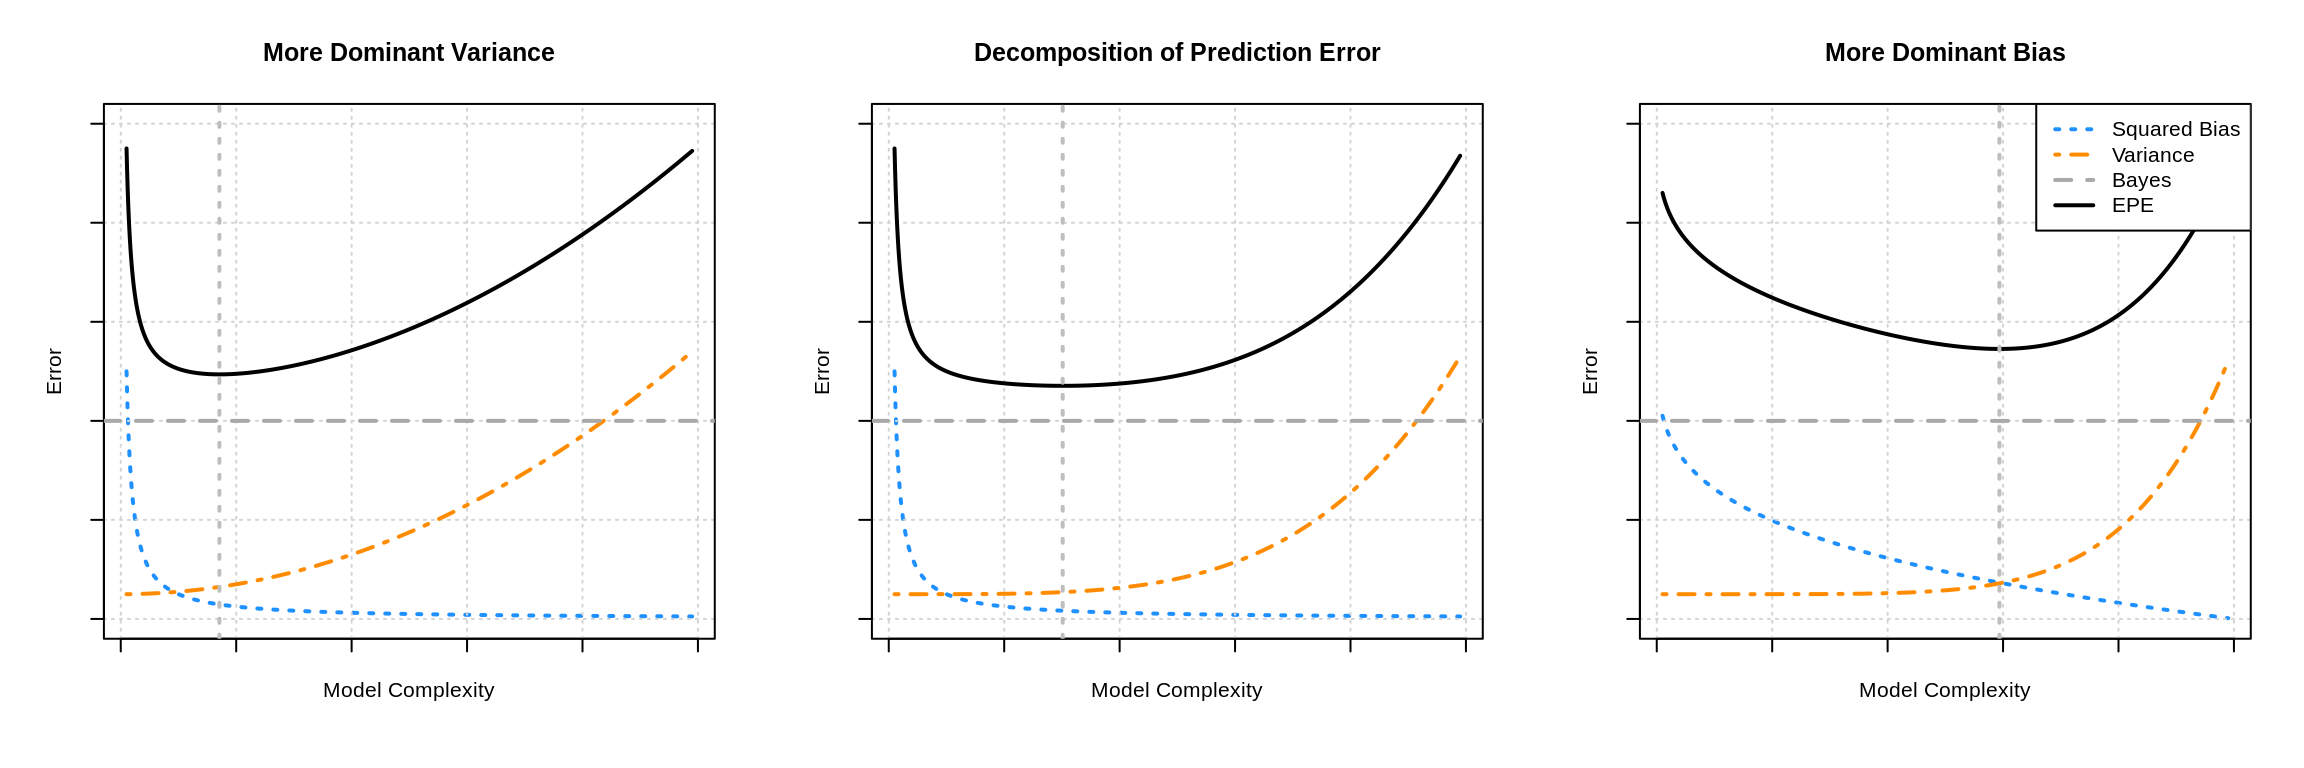

The test RMSE is essentially the expected prediction error, which is known to decompose into (squared) bias, variance, and the irreducible Bayes error. The above plots show three examples of this. Test RMSE decreases and then starts to increase as the model becomes more complex. its lowest point, right before it starts increasing, denotes the intersection between variance and squared bias, which also corresponds to the point that has low bias and low complexity, which is what we look for a in a good model. 

Hence, tuning the xgboost parameters was imperative. As such, I decided to GridSearchCV to help investigate the best set of parameters for the xgboost model. However, improvements could have been made. Unfortunately, I did not have enough time to attempt to go through every set of possible inputs for the parameters, due to my laptop's slow computational speed. Furthermore, performance of the model is largly attributed to the variables fed into it during training, as such, I do feel that with further feature engineering, this model's performance would have definitely increased.

#### Q5: How should this model be used when creating a lease offer to a landlord?

predictions can be made via feeding a dataframe that includes the data relevent to the lising to the output_preds function.

#### Q6: What other sources or data points would you need in order to improve the model’s predictive functionality?

In order to improve the model, I could have attempted to engineer some extra features, however, given the limited number of variables, I was quite uncertain as to what features could be engineered that could improve the model and did not attempt that step.

However, data points that intuitively would affect rent could be used to improve the model. Such data points include : if the residence is pet friendly, if there is a pool, if it is near a business district, if it has a basement and the condition of the basement (for houses/townhouses), Age of the residence, whether it is furnished etc. 